### Code to calculate simple math using the Router/conditional node

### **** Condition is NOT working **** Need to check later

In [81]:
### Initiating the imports needed
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os
load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [82]:
## Createing Nodes

def add(a:int,b:int)->int:
    """Addiing two intigers a and b.
        Args:
        a: int
        b: int
    """
    return a+b

def mult(a:int,b:int)->int:
    """Multiply two intigers a and b.
        Args:
        a: int
        b: int
    """
    return a*b

def sub(a:int,b:int)->int:
    """subract two intigers a and b.
        Args:
        a: int
        b: int
    """
    return a-b

def divd(a:int,b:int)->int:
    """Divid two intigers a and b.
        Args:
        a: int
        b: int
    """
    return a/b

tool_kit =[add,mult,sub,divd]


In [83]:
tool_kit

[<function __main__.add(a: int, b: int) -> int>,
 <function __main__.mult(a: int, b: int) -> int>,
 <function __main__.sub(a: int, b: int) -> int>,
 <function __main__.divd(a: int, b: int) -> int>]

### Initiating the LLM and binding the Tool kit which is a list

In [84]:
## Crating LLM instance
llm=ChatGroq(model="qwen/qwen3-32b")

## Binding LLM with tool kit

llm_with_tools = llm.bind_tools(tool_kit)
from langchain_core.messages import HumanMessage,AIMessage
llm_with_tools.invoke([HumanMessage(content="what is 2+2-3?",name="Naveen")])



AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, let\'s see. The user is asking "what is 2+2-3?" So I need to figure out the correct order of operations here. Addition and subtraction are at the same level, so we do them from left to right. \n\nFirst, 2 + 2 equals 4. Then, subtract 3 from that result. So 4 - 3 gives 1. \n\nNow, looking at the tools provided, there\'s an add function and a subtract function. I can use those. First, call add with a=2 and b=2. Then, take the result and call sub with a=4 (the result from add) and b=3. \n\nWait, but the user wants the final answer. Since the functions can be chained, I need to make sure each step is executed in order. The first tool call is add(2,2), which returns 4. The second tool call is sub(4,3), which returns 1. \n\nSo the final answer should be 1. I should structure the tool calls accordingly.\n', 'tool_calls': [{'id': '2phhpycdh', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'add'}, 'type': 'function'}, {'id

### improting the Tool Node and tools condition 

In [85]:
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode,tools_condition
from pydantic import BaseModel
from langchain_core.messages import HumanMessage,AIMessage

In [86]:
tools = ToolNode(tool_kit)


In [87]:
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

class calculate(BaseModel):
    messages:Annotated[list[AnyMessage],add_messages]



In [88]:
### Node Cretaion to make a correct node call

def llm_call(state: calculate):
    return {"messages":[llm_with_tools.invoke(state.messages)]}

In [89]:
def tools(state:calculate):
    return {tools.invoke(state.messages)}
   # return {"messages":[AIMessage(content=str(result))]}
    

In [ ]:
### Building Graph

graph = StateGraph(calculate)

graph.add_node("llm_call",llm_call)

# Tool condition alway use the veriable tools only

graph.add_node("tools",tools)

graph.add_edge(START,"llm_call")
graph.add_conditional_edges("llm_call",tools_condition)
graph.add_edge("tools",END)



In [91]:
graph_bild = graph.compile()

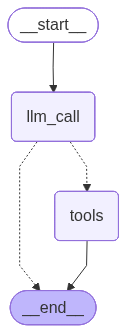

In [92]:
from pprint import PrettyPrinter

display(Image(graph_bild.get_graph().draw_mermaid_png()))

In [93]:

#messages =[HumanMessage(content="What is blackhole?", name="Naveen")]
messages ="what is blackhole?"
messages =graph_bild.invoke({"messages":messages})

for messages in messages['messages']:
    messages.pretty_print()




================================ Human Message =================================

what is blackhole?
================================== Ai Message ==================================

The functions available to me are for performing arithmetic operations like addition, multiplication, subtraction, and division. I don’t have access to external information or definitions, so I can’t explain what a black hole is. Would you like help with a math problem instead?
